In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import folium
import json

In [3]:
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [4]:
pop_1 = pd.read_csv("datas/population_ages_E.csv", encoding="cp949")
pop_1.columns = (
    pop_1.columns.str.replace('2025년03월_', '', regex=False)
)
pop_1

,행정구역,2024년_계_총인구수,2024년_계_연령구간인구수,2024년_계_0~9세,2024년_계_10~19세,2024년_계_20~29세,2024년_계_30~39세,2024년_계_40~49세,2024년_계_50~59세,2024년_계_60~69세,...,2024년_여_10~19세,2024년_여_20~29세,2024년_여_30~39세,2024년_여_40~49세,2024년_여_50~59세,2024년_여_60~69세,2024년_여_70~79세,2024년_여_80~89세,2024년_여_90~99세,2024년_여_100세 이상
0,서울특별시 은평구 (1138000000),"460,919","460,919","22,056","34,299","59,286","66,321","67,227","77,598","69,457",...,"16,744","31,922","33,925","34,087","40,285","37,203","23,510","12,377","1,830",51
1,서울특별시 은평구 녹번동(1138051000),"35,578","35,578","1,882","2,069","4,271","5,555","5,217","5,784","5,448",...,"1,050","2,342","2,870","2,575","3,033","2,976","2,002","1,020",168,2
2,서울특별시 은평구 불광제1동(1138052000),"37,311","37,311","1,662","2,295","4,678","5,402","5,048","6,315","6,113",...,"1,082","2,520","2,711","2,600","3,343","3,303","2,072","1,208",178,3
3,서울특별시 은평구 불광제2동(1138053000),"26,566","26,566",724,"1,364","3,663","3,803","3,304","4,566","4,655",...,657,"1,884","1,835","1,595","2,379","2,484","1,623",883,106,3
4,서울특별시 은평구 갈현제1동(1138055100),"14,180","14,180",408,904,"2,000","2,056","1,843","2,435","2,373",...,428,"1,040",987,899,"1,292","1,278",792,396,56,3
5,서울특별시 은평구 갈현제2동(1138055200),"27,308","27,308",927,"2,118","3,821","3,595","3,839","4,948","4,259",...,"1,047","2,075","1,785","1,932","2,640","2,334","1,403",712,88,1
6,서울특별시 은평구 구산동(1138056000),"31,045","31,045","1,131","2,412","4,002","3,765","4,272","5,676","5,198",...,"1,243","2,133","1,867","2,124","2,893","2,658","1,571",859,106,2
7,서울특별시 은평구 대조동(1138057000),"27,248","27,248",823,"1,336","4,852","5,209","3,410","4,039","3,756",...,686,"2,929","2,628","1,702","2,112","2,004","1,405",766,86,3
8,서울특별시 은평구 응암제1동(1138058000),"32,175","32,175","1,972","2,511","4,152","5,118","5,163","5,193","4,142",...,"1,210","2,395","2,706","2,636","2,706","2,235","1,491",766,101,6
9,서울특별시 은평구 응암제2동(1138059000),"27,142","27,142","2,542","2,671","2,371","4,038","5,471","4,051","3,092",...,"1,248","1,204","2,202","2,736","2,023","1,684","1,061",549,91,3


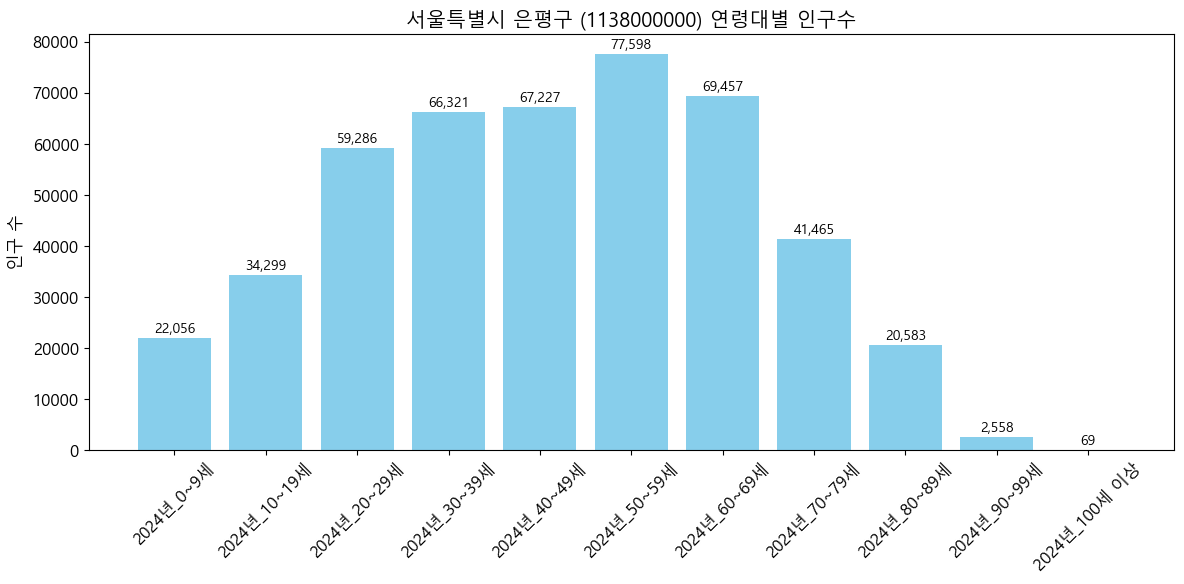

In [5]:
age_cols = pop_1.columns[3:14]
age_values = pop_1.iloc[0, 3:14].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)
x_labels = [col.replace("계_", "") for col in age_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, age_values, color='skyblue')
plt.xticks(rotation=45)
plt.title(f"{pop_1.iloc[0, 0]} 연령대별 인구수")
plt.ylabel("인구 수")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 400,  # 막대보다 약간 위에
        f'{height:,}',  # 천 단위 쉼표 표시
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [11]:
pop_2 = pd.read_csv("datas/population_all_E.csv", encoding="cp949")
pop_2.columns = (
    pop_2.columns.str.replace('2024년_', '', regex=False)
)
pop_2

,행정구역,거주자 인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 서울특별시 은평구 (1138000000),"457,957","213,255",2.15,"216,808","241,149",0.90
1,서울특별시 은평구 녹번동(1138051000),"35,289","17,282",2.04,"16,444","18,845",0.87
2,서울특별시 은평구 불광제1동(1138052000),"37,052","17,814",2.08,"17,360","19,692",0.88
3,서울특별시 은평구 불광제2동(1138053000),"26,368","13,993",1.88,"12,659","13,709",0.92
4,서울특별시 은평구 갈현제1동(1138055100),"14,012","7,070",1.98,"6,733","7,279",0.92
5,서울특별시 은평구 갈현제2동(1138055200),"27,139","12,642",2.15,"12,772","14,367",0.89
6,서울특별시 은평구 구산동(1138056000),"30,869","13,381",2.31,"14,954","15,915",0.94
7,서울특별시 은평구 대조동(1138057000),"27,059","15,383",1.76,"12,451","14,608",0.85
8,서울특별시 은평구 응암제1동(1138058000),"31,965","14,908",2.14,"14,868","17,097",0.87
9,서울특별시 은평구 응암제2동(1138059000),"26,966","10,873",2.48,"13,007","13,959",0.93


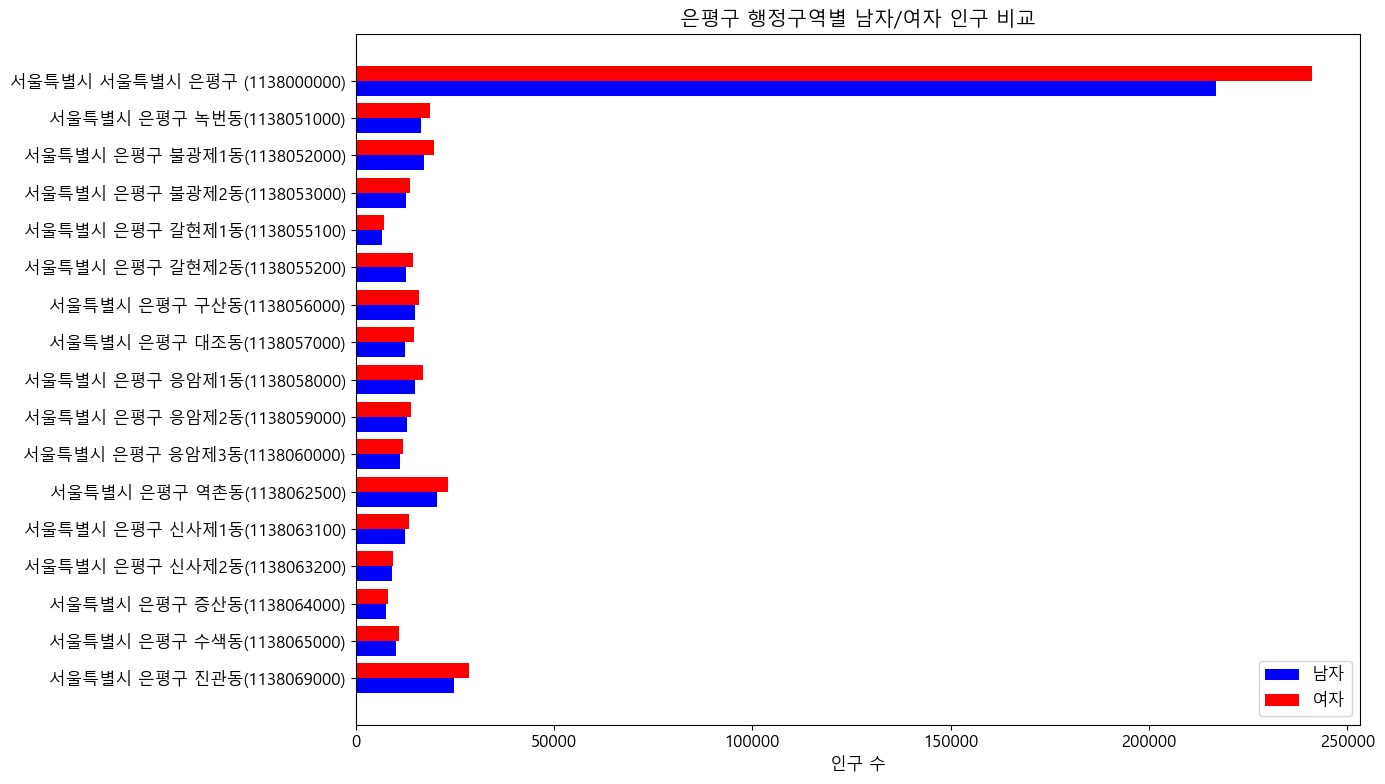

In [12]:
pop_2['남자 인구수'] = pop_2['남자 인구수'].str.replace(',', '').astype(int)
pop_2['여자 인구수'] = pop_2['여자 인구수'].str.replace(',', '').astype(int)

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(pop_2))

plt.barh([i + bar_width for i in index], pop_2['남자 인구수'], bar_width, label='남자', color='blue')
plt.barh(index, pop_2['여자 인구수'], bar_width, label='여자', color='red')

plt.yticks([i + bar_width / 2 for i in index], pop_2['행정구역'])
plt.xlabel('인구 수')
plt.title('은평구 행정구역별 남자/여자 인구 비교')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
행정구역 = [
    '은평구', '녹번동', '불광제1동', '불광제2동', 
    '갈현제1동', '갈현제2동', '구산동', '대조동', 
    '응암제1동', '응암제2동', '응암제3동', '역촌동', 
    '신사제1동', '신사제2동', '증산동', '수색동', '진관동'

]

인구수 = [
    457957, 35289, 37052, 26368, 
    14012, 27139, 30869, 27059, 
    31965, 26966, 23035, 43684, 
    25891, 18620, 15746, 21048, 53214
]


위도 = [
    37.6026972, 37.606953, 37.610000, 37.612000, 37.620000, 
    37.622000, 37.605000, 37.607000, 37.588753, 
    37.590000, 37.592000, 37.598000, 37.600000, 
    37.602000, 37.584431, 37.580000, 37.632196,
    
]

경도 = [
    126.9291111, 126.935107, 126.930000, 126.932000, 126.920000, 
    126.922000, 126.915000, 126.918000, 126.921616, 
    126.923000, 126.925000, 126.917000, 126.910000, 
    126.912000, 126.903036, 126.900000, 126.920816

]

df = pd.DataFrame({
    '행정구역': 행정구역,
    '인구수': 인구수,
    '위도': 위도,
    '경도': 경도
})


m = folium.Map(location=[37.6360, 127.2165], zoom_start=11)

for _, row in df.iterrows():
    if pd.notna(row['위도']) and pd.notna(row['경도']):
        population_text = f"{row['인구수']:,}명" if row['인구수'] > 0 else "정보 없음" # 0명일 경우 다르게 표시 (선택사항)
        popup = f"<b>{row['행정구역']}</b><br>인구수: {population_text}"
        if row['인구수'] >= 200000:
            color = 'orange' 
        elif row['인구수'] >= 25000:
            color = 'red'
        else:
            color = 'blue'
        
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=popup,
            tooltip=row['행정구역'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

m


In [13]:
pop_3 = pd.read_csv("datas/population_change_E.csv", encoding="cp949")
pop_3

,행정구역,2017년_총인구수,2017년_세대수,2017년_세대당 인구,2017년_남자 인구수,2017년_여자 인구수,2017년_남여 비율,2018년_총인구수,2018년_세대수,2018년_세대당 인구,...,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율,2024년_총인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
0,서울특별시 서울특별시 은평구 (1138000000),"486,794","202,839",2.40,"236,353","250,441",0.94,"483,197","205,001",2.36,...,2.16,"221,725","245,045",0.90,"460,919","215,305",2.14,"218,214","242,705",0.90
1,서울특별시 은평구 녹번동(1138051000),"32,645","14,595",2.24,"15,782","16,863",0.94,"34,500","15,627",2.21,...,2.05,"16,949","19,162",0.88,"35,578","17,481",2.04,"16,578","19,000",0.87
2,서울특별시 은평구 불광제1동(1138052000),"42,038","17,661",2.38,"20,114","21,924",0.92,"41,260","17,744",2.33,...,2.12,"17,589","19,850",0.89,"37,311","17,972",2.08,"17,471","19,840",0.88
3,서울특별시 은평구 불광제2동(1138053000),"29,902","13,576",2.20,"14,626","15,276",0.96,"29,612","13,712",2.16,...,1.90,"12,850","13,888",0.93,"26,566","14,135",1.88,"12,761","13,805",0.92
4,서울특별시 은평구 갈현제1동(1138055100),"25,271","11,075",2.28,"12,357","12,914",0.96,"24,899","11,183",2.23,...,1.97,"7,028","7,454",0.94,"14,180","7,220",1.96,"6,828","7,352",0.93
5,서울특별시 은평구 갈현제2동(1138055200),"30,523","12,386",2.46,"14,638","15,885",0.92,"30,301","12,593",2.41,...,2.19,"12,959","14,482",0.89,"27,308","12,753",2.14,"12,846","14,462",0.89
6,서울특별시 은평구 구산동(1138056000),"33,589","12,551",2.68,"16,842","16,747",1.01,"33,894","12,950",2.62,...,2.33,"15,290","16,163",0.95,"31,045","13,499",2.30,"15,048","15,997",0.94
7,서울특별시 은평구 대조동(1138057000),"32,944","15,743",2.09,"15,610","17,334",0.90,"32,186","15,671",2.05,...,1.78,"12,635","14,734",0.86,"27,248","15,533",1.75,"12,555","14,693",0.85
8,서울특별시 은평구 응암제1동(1138058000),"26,130","11,227",2.33,"12,556","13,574",0.93,"25,882","11,280",2.29,...,2.16,"15,260","17,398",0.88,"32,175","15,059",2.14,"14,974","17,201",0.87
9,서울특별시 은평구 응암제2동(1138059000),"21,515","8,507",2.53,"10,552","10,963",0.96,"20,878","8,213",2.54,...,2.48,"13,199","14,145",0.93,"27,142","10,994",2.47,"13,093","14,049",0.93


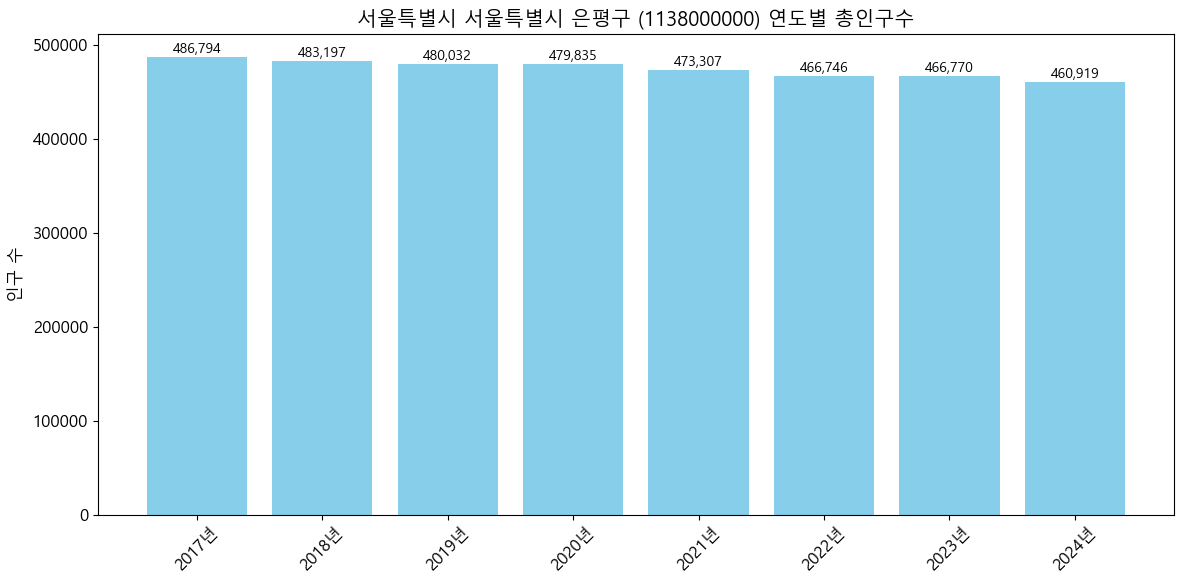

In [14]:
total_pop_cols = [col for col in pop_3.columns if "총인구수" in col
]
age_values = pop_3.loc[0, total_pop_cols].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)

age_cols = [col.replace("_총인구수", "") for col in total_pop_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(age_cols, age_values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1000,
        f'{height:,}',
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.title(f"{pop_3.iloc[0, 0]} 연도별 총인구수")
plt.ylabel("인구 수")
plt.tight_layout()
plt.show()